In [1]:
import os
datasetdir = '/home/azure/passion/Datasets/DeepFashion(Customized)/DeepFashion/Train'
os.chdir(datasetdir)

# import the needed packages
import matplotlib.pyplot as plt
import matplotlib.image as img
import tensorflow.keras as keras
import numpy as np
import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

In [2]:
# tensorflow gpu available
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
# vm device
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5616021841845201776
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14648653952
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8983696171530390177
physical_device_desc: "device: 0, name: NVIDIA Tesla T4, pci bus id: 0001:00:00.0, compute capability: 7.5"
]


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datasetdir = r'/home/azure/passion/Datasets/DeepFashion(Customized)/DeepFashion/Train'
batch_size = 3

def DataLoad(shape, preprocessing): 
    '''Create the training and validation datasets for 
    a given image shape.
    '''
    imgdatagen = ImageDataGenerator(
        preprocessing_function = preprocessing,
        horizontal_flip = True, 
        validation_split = 0.1,
    )

    height, width = shape

    train_dataset = imgdatagen.flow_from_directory(
        os.getcwd(),
        target_size = (height, width), 
        classes = ['Blazer', 'Blouse', 'Cardigan', 'Dress', 'Jacket',
                 'Jeans', 'Jumpsuit', 'Romper', 'Shorts', 'Skirts', 'Sweater', 'Sweatpants', 'Tank', 'Tee', 'Top'],
        batch_size = batch_size,
        subset = 'training', 
    )

    val_dataset = imgdatagen.flow_from_directory(
        os.getcwd(),
        target_size = (height, width), 
        classes = ['Blazer', 'Blouse', 'Cardigan', 'Dress', 'Jacket',
                 'Jeans', 'Jumpsuit', 'Romper', 'Shorts', 'Skirts', 'Sweater', 'Sweatpants', 'Tank', 'Tee', 'Top'],
        batch_size = batch_size,
        subset = 'validation'
    )
    return train_dataset, val_dataset

In [5]:
vgg16 = keras.applications.vgg16
conv_model = vgg16.VGG16(weights='imagenet', include_top=False)
conv_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [6]:
train_dataset, val_dataset = DataLoad((224,224), preprocessing=vgg16.preprocess_input)
# Function for plots images with labels within jupyter notebook
X_train, y_train = next(train_dataset)

# X_train = X_train / 255.0


# X_train=np.asarray(X_train)


classes = np.array(['Blazer', 'Blouse', 'Cardigan', 'Dress', 'Jacket',
                    'Jeans', 'Jumpsuit', 'Romper', 'Shorts', 'Skirts', 'Sweater', 'Sweatpants', 'Tank', 'Tee', 'Top'])
# # #classes=np.array(classes)
# # classes = classes.astype('int64')

# # print(classes)

Found 7704 images belonging to 15 classes.
Found 848 images belonging to 15 classes.


In [7]:
# plt.figure(figsize=(10,10))
# for i in range(25):
#     plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(X_train[i], cmap=plt.cm.binary)
#     plt.xlabel(classes[y_train[i]])
# plt.show()

In [8]:
conv_model = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))


In [9]:
# flatten the output of the convolutional part: 
x = keras.layers.Flatten()(conv_model.output)
# three hidden layers
x = keras.layers.Dense(100, activation='relu')(x)
x = keras.layers.Dense(100, activation='relu')(x)
x = keras.layers.Dense(100, activation='relu')(x)
# final softmax layer with 15 categories
predictions = keras.layers.Dense(15, activation='softmax')(x)

# creating the full model:
full_model = keras.models.Model(inputs=conv_model.input, outputs=predictions)
full_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [10]:
for layer in conv_model.layers:
    layer.trainable = False

In [11]:
full_model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [13]:
full_model.compile(loss='binary_crossentropy',
                  optimizer=keras.optimizers.Adamax(lr=0.001),
                  metrics=['acc'])
history = full_model.fit(
    train_dataset, 
    validation_data = val_dataset,
    workers=0,
    epochs=3,
)


Epoch 1/3
2568/2568 [==============================] - 59s 23ms/step - loss: 0.2264 - acc: 0.3255 - val_loss: 0.1758 - val_acc: 0.4399
Epoch 2/3
2568/2568 [==============================] - 60s 23ms/step - loss: 0.1448 - acc: 0.5354 - val_loss: 0.1736 - val_acc: 0.4634
Epoch 3/3
2568/2568 [==============================] - 62s 24ms/step - loss: 0.1203 - acc: 0.6391 - val_loss: 0.1672 - val_acc: 0.4752


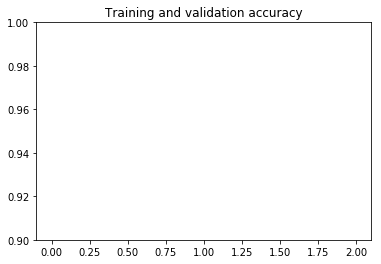

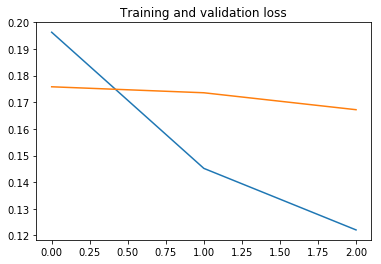

In [14]:
def plot_history(history, yrange):
    '''Plot loss and accuracy as a function of the epoch,
    for the training and validation datasets.
    '''
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get number of epochs
    epochs = range(len(acc))

    # Plot training and validation accuracy per epoch
    plt.plot(epochs, acc)
    plt.plot(epochs, val_acc)
    plt.title('Training and validation accuracy')
    plt.ylim(yrange)
    
    # Plot training and validation loss per epoch
    plt.figure()

    plt.plot(epochs, loss)
    plt.plot(epochs, val_loss)
    plt.title('Training and validation loss')
    
    plt.show()
    
plot_history(history, yrange=(0.9,1))




In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_dir=r'/home/azure/passion/Datasets/DeepFashion(Customized)/DeepFashion/Test'
test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=3, class_mode='categorical')
X_test, y_test = next(test_generator)

Testresults = full_model.evaluate(test_generator)
print("test loss, test acc:", Testresults)

Found 1009 images belonging to 15 classes.
337/337 [==============================] - 7s 22ms/step - loss: 0.4053 - acc: 0.4311
test loss, test acc: [0.4053051173686981, 0.4311199188232422]


In [17]:
classes = ['Blazer', 'Blouse', 'Cardigan', 'Dress', 'Jacket',
                 'Jeans', 'Jumpsuit', 'Romper', 'Shorts', 'Skirts', 'Sweater', 'Sweatpants', 'Tank', 'Tee', 'Top']

[[1.2297779e-03 4.6182558e-04 6.1672240e-06 5.5665137e-06 2.1877850e-05
  9.9633300e-01 7.6286442e-04 8.5523861e-06 1.0909805e-04 6.7630060e-13
  8.9324167e-05 1.8683790e-04 4.4258239e-05 7.1350444e-04 2.7325907e-05]]


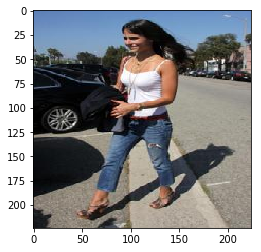

In [19]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

img_path = r'/home/azure/passion/Datasets/DeepFashion(Customized)/DeepFashion/Test/Jeans/img_00000052.jpg'
img = image.load_img(img_path, target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
c=full_model.predict(x)
print(c)
plt.imshow(img)

In [20]:
def get_class_string_from_index(index):
   for class_string, class_index in test_generator.class_indices.items():
      if class_index == index:
         return class_string
    
Predicted_Class=np.argmax(c, axis = 1)
print('Predicted_Class is:', Predicted_Class)     #Get the rounded value of the predicted class
true_index = 5
# print('true_label is:', true_labels)     #Get the rounded value of the predicted class
print("True label: " + get_class_string_from_index(true_index))
print("Predicted label: " + get_class_string_from_index(Predicted_Class))


Predicted_Class is: [5]
True label: Jeans
Predicted label: Jeans


In [21]:
# Calculating number of misclassified images
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=3, class_mode='categorical')
X_test, y_test = next(test_generator)
X_test=X_test/255
preds = full_model.predict(X_test)
pred_labels = np.argmax(preds, axis=1)
true_labels = np.argmax(y_test, axis=1)
print (pred_labels)
print (true_labels)

Found 1009 images belonging to 15 classes.
[10  1  1]
[9 1 1]


In [22]:
mispred_img = X_test[pred_labels!=true_labels]
mispred_true = true_labels[pred_labels!=true_labels]
mispred_pred = pred_labels[pred_labels!=true_labels]
print ('number of misclassified images:', mispred_img.shape[0])

number of misclassified images: 1


In [31]:
def plot_img_results(array, true, pred, i, n=1):
    # plot the image and the target for sample i
    ncols = 3
    nrows = n/ncols + 1
    fig = plt.figure( figsize=(ncols*2, nrows*2), dpi=100)
    for j in range(n):
      index = j+i
      plt.subplot(nrows,ncols, j+1)
      plt.imshow(array[index])
      plt.title('true: {} pred: {}'.format(true[index], pred[index]))
      plt.axis('off')

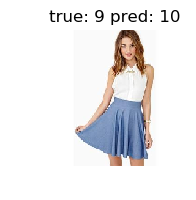

In [32]:
plot_img_results(mispred_img, mispred_true, mispred_pred, 0, len(mispred_img))


In [25]:
# To get the labels as names:
classes[13]

'Tee'

Found 1009 images belonging to 15 classes.


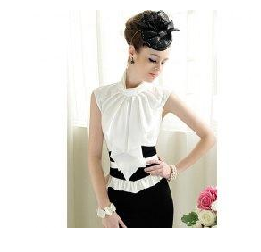

True label: Blouse
Predicted label: Sweater


In [33]:
# Selecting images from any test_dataset and classify it
def get_class_string_from_index(index):
   for class_string, class_index in test_generator.class_indices.items():
      if class_index == index:
         return class_string
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=7, class_mode='categorical')
X_test, y_test = next(test_generator)
X_test=X_test/255
image = X_test[1]
true_index = np.argmax(y_test[1])
plt.imshow(image)
plt.axis('off')
plt.show()

# Expand the image to (1, 224, 224, 3) before predicting the label
prediction_scores = full_model.predict(np.expand_dims(image, axis=0))
predicted_index = np.argmax(prediction_scores)
print("True label: " + get_class_string_from_index(true_index))
print("Predicted label: " + get_class_string_from_index(predicted_index))

In [30]:
# Testing on Camera images

img_path = r'/home/azure/passion/Datasets/DeepFashion(Customized)/DeepFashion/PhoneData/Data/20210226_215041.jpg'
img = image.load_img(img_path, target_size=(224,224,3))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
c=full_model.predict(x)
print(c)
plt.imshow(img)

AttributeError: 'numpy.ndarray' object has no attribute 'load_img'

In [214]:
Predicted_Class=np.argmax(c, axis = 1)
print('Predicted_Class is:', Predicted_Class)     #Get the rounded value of the predicted class

Predicted_Class is: [8]


In [215]:
classes[8]

'Shorts'